# Usage examples

In [1]:
from calculatingfeatures.CalculatingFeatures.calculate_features import calculateFeatures, calculateFeatures, convertInputInto2d, convertInputInto2dTime
from calculatingfeatures.CalculatingFeatures.helper_functions import gsrFeatureNames, frequencyFeatureNames, hrvFeatureNames, genericFeatureNames, accelerometerFeatureNames, gyroscopeFeatureNames
import CalculatingFeatures.feature_functions as functions
import random
import numpy as np
import time as t
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from calculatingfeatures.CalculatingFeatures.calculate_hrv_peaks import peak_detector
%matplotlib notebook

## Calculate HRV and frequency features with calculateFeatures() from empatica file

In [2]:
from calculatingfeatures.CalculatingFeatures.helper_functions import convert1DEmpaticaToArray

pathToHrvCsv = "example_data/S2_E4_Data/BVP.csv"
windowLength = 500

#np.seterr(all='raise')

# get an array of values from HRV empatica file
hrv_data, startTimeStamp, sampleRate = convert1DEmpaticaToArray(pathToHrvCsv)

# Convert the HRV data into 2D array
hrv_data_2D = convertInputInto2d(hrv_data, windowLength)

# Create a list with feature names
featureNames = []
featureNames.extend(hrvFeatureNames)
featureNames.extend(frequencyFeatureNames)

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# Calculate features
calculatedFeatures = calculateFeatures(hrv_data_2D, fs=int(sampleRate), featureNames=featureNames)
print(calculatedFeatures)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1008/1008 [02:07<00:00,  7.89it/s]

         ibi_X   meanHr_X  numRR_X     pnn20_X     pnn50_X   rmssd_X  \
0     0.863281  69.502262      4.0   66.666667   66.666667  0.170449   
1     0.720313  83.297180     10.0   66.666667   33.333333  0.050765   
2     0.679688  88.275862      8.0   85.714286   28.571429  0.045363   
3     0.723437  82.937365     10.0   77.777778   55.555556  0.103382   
4     0.800347  74.967462      9.0   62.500000   37.500000  0.057675   
...        ...        ...      ...         ...         ...       ...   
1003  1.097656  54.661922      4.0   33.333333   33.333333  0.045999   
1004  0.805804  74.459834      7.0   83.333333   83.333333  0.137701   
1005  0.911458  65.828571      6.0  100.000000   80.000000  0.098326   
1006       NaN        NaN      3.0         NaN         NaN       NaN   
1007  1.515625  39.587629      4.0  100.000000  100.000000  0.138878   

      sd1/sd2_X     sd2_X      sd_X    sdnn_X    sdsd_X  
0      0.523417  0.120684  0.063168  0.089333  0.096319  
1      1.405853  0.

## Calculate ACC features with calculateFeatures() from empatica file

In [3]:
from calculatingfeatures.CalculatingFeatures.helper_functions import convert3DEmpaticaToArray

pathToAccCsv = "example_data/S2_E4_Data/ACC.csv"
windowLength = 500

#np.seterr(all='raise')

# get an array of values from ACC empatica file
data, startTimeStamp, sampleRate = convert3DEmpaticaToArray(pathToAccCsv)

# Convert the ACC data into 2D array
x_2D = convertInputInto2d(data[0], windowLength)
y_2D = convertInputInto2d(data[1], windowLength)
z_2D = convertInputInto2d(data[2], windowLength)

# Create a list with feature names
featureNames = []
featureNames.extend(accelerometerFeatureNames)
featureNames.extend(frequencyFeatureNames)

pd.set_option('display.max_columns', None)

# Calculate features
calculatedFeatures = calculateFeatures(x_2D, y_2D, z_2D, fs=int(sampleRate), featureNames=featureNames)
print(calculatedFeatures)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 504/504 [03:46<00:00,  2.23it/s]

     absoluteAreaAllBand  absoluteArea_XBand  absoluteArea_YBand  \
0             312.592555           72.500968          -16.538178   
1             864.715960           72.220023          -21.781158   
2            3616.215615           74.042112          -77.602245   
3            4165.495456          105.191655          -79.146730   
4            8033.196394           95.132686         -124.754418   
..                   ...                 ...                 ...   
499           384.671068           88.880824         -121.088645   
500           611.899981           90.148744         -125.571337   
501          1307.327021           98.014717         -123.718204   
502           778.281403          102.766032         -118.941814   
503           898.820043           37.005843          -49.001318   

     absoluteArea_ZBand  absoluteMean_XBand  absoluteMean_YBand  \
0            137.499998            0.145002           -0.033076   
1            137.184763            0.144440      

## convertInputInto2dTime

In [4]:
df = pd.DataFrame()
df["data"] = [10, 150, 1100, 1150, 1200, 1300, 1400, 1500, 1600]
df["time"] = [0, 50, 100, 150, 200, 300, 400, 500, 600]

outData, outTime = convertInputInto2dTime(df, 200)
print(outData)
print(outTime)

[[10, 150, 1100, 1150], [1200, 1300], [1400, 1500], [1600]]
[[0, 50, 100, 150], [200, 300], [400, 500], [600]]


## Calculate all features

In [5]:
INPUT_LEN = 5000
random.seed(1234)
np.random.seed(1234)

x = np.array([random.random() * 20 - 10 for _ in range(INPUT_LEN)])
y = np.array([random.random() * 20 - 10 for _ in range(INPUT_LEN)])
z = np.array([random.random() * 20 - 10 for _ in range(INPUT_LEN)])
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

time = [i*0.01 for i in range(INPUT_LEN)]

numCols = 300

ax = convertInputInto2d(x, numCols)
ay = convertInputInto2d(y, numCols)
az = convertInputInto2d(z, numCols)

time = convertInputInto2d(time, numCols)

df = calculateFeatures(ax, ay, az, time)

print(df)

 24%|██▎       | 4/17 [00:03<00:11,  1.12it/s]

Bad signal. Too little RRs detected. 1


 29%|██▉       | 5/17 [00:04<00:11,  1.08it/s]

Bad signal. Too little RRs detected. 1


 35%|███▌      | 6/17 [00:05<00:10,  1.09it/s]

Bad signal. Too little RRs detected. 1
Bad signal. Too little RRs detected. 1


 53%|█████▎    | 9/17 [00:08<00:07,  1.06it/s]

Bad signal. Too little RRs detected. 1


 59%|█████▉    | 10/17 [00:09<00:06,  1.07it/s]

Bad signal. Too little RRs detected. 1


 71%|███████   | 12/17 [00:11<00:04,  1.12it/s]

Bad signal. Too little RRs detected. 1


 88%|████████▊ | 15/17 [00:13<00:01,  1.06it/s]

Bad signal. Too little RRs detected. 1


100%|██████████| 17/17 [00:15<00:00,  1.09it/s]

Bad signal. Too little RRs detected. 1
Bad signal. Too little RRs detected. 1


     absEnergy_X   absEnergy_Y   absEnergy_Z  absoluteAreaAllBand  \
0    9757.282156  10849.028553   9811.741631           930.324637   
1    9448.079674   8899.975693   9956.680101           880.255964   
2    9669.760737   9184.529987   9121.402956           889.394563   
3   10026.356290   9801.236188   9982.377726           920.462589   
4    9709.603922  10691.230186   9662.734156           906.331468   
5   10233.693555  10371.886729  10563.612304           922.999063   
6    9482.841316  10326.075806  10154.052192           891.241288   
7    9520.121266  10241.641412  10387.903719           889.958466   
8   10395.792313  10179.629166  10107.379246           899.898502   
9   11026.931493   9834.741763  10120.339487           937.539507   
10   9574.581294   8891.577695   9480.013849           853.098151   
11  10266.304113   9524.407888   9519.015587           894.370062   
12   9639.580580   9683.493055  10251.534492           912.690717   
13  10149.017500   9632.893918   9

## Calculate execution times

In [6]:
DATA_LEN = 100000
PRINT_OUTPUT = False


def timeFunc(fName, f, *args):
    start_time = t.time()
    out = f(*args)
    print(fName, " " * (40-len(fName)), t.time() - start_time, "seconds")
    if PRINT_OUTPUT:
        print(out)

In [7]:
magnitudes = np.array([random.random() * 100 for _ in range(DATA_LEN)])
time = np.array([random.randint(1499719594, 1599719594) for _ in range(DATA_LEN)])

x = np.array([random.random() * 100 for _ in range(DATA_LEN)])
y = np.array([random.random() * 100 for _ in range(DATA_LEN)])
z = np.array([random.random() * 100 for _ in range(DATA_LEN)])

timeFunc("compute_features", functions.computeFreqFeatures, magnitudes)

timeFunc("calcAreaUnderAccelerationMagnitude", functions.calcAreaUnderAccelerationMagnitude, magnitudes, time)
timeFunc("calcAverageVectorLength", functions.calcAverageVectorLength, magnitudes)
timeFunc("calcAverageVectorLengthPower", functions.calcAverageVectorLengthPower, magnitudes)
timeFunc("calcMeanKineticEnergy", functions.calcMeanKineticEnergy, magnitudes, time)
timeFunc("calcPeaks", functions.calcPeaks, magnitudes)
timeFunc("calcTotalKineticEnergy", functions.calcTotalKineticEnergy, x, y, z, time)
timeFunc("calcAcAbsoluteArea", functions.calcAcAbsoluteArea, x, y, z)
timeFunc("calcAbsoluteMean", functions.calcAbsoluteMean, magnitudes)
timeFunc("calcAmplitude", functions.calcAmplitude, magnitudes)
timeFunc("calcCoefficientOfVariation", functions.calcCoefficientOfVariation, magnitudes)
timeFunc("calcCorrelation", functions.calcCorrelation, magnitudes, magnitudes[::-1])
timeFunc("calcEntropy", functions.calcEntropy, magnitudes)
timeFunc("calcInterQuartileRange", functions.calcInterQuartileRange, magnitudes)
timeFunc("calcKurtosis", functions.calcKurtosis, magnitudes)
timeFunc("calcMeanCrossingRate", functions.calcMeanCrossingRate, magnitudes)
timeFunc("calcQuartiles", functions.calcQuartiles, magnitudes)
timeFunc("calcSkewness", functions.calcSkewness, magnitudes)
timeFunc("calcTotalAbsoluteArea", functions.calcTotalAbsoluteArea, magnitudes)
timeFunc("calcTotalEnergy", functions.calcTotalEnergy, magnitudes)
timeFunc("calcDominantFrequencyEnergy", functions.calcDominantFrequencyEnergy, magnitudes)
timeFunc("calcTotalMagnitude", functions.calcTotalMagnitude, x, y, z)
timeFunc("calcVariance", functions.calcVariance, magnitudes)
timeFunc("calcArea", functions.calcArea, magnitudes)
timeFunc("calcMean", functions.calcMean, magnitudes)
timeFunc("calcPostureDistance", functions.calcPostureDistance, functions.calcMean(x), functions.calcMean(y),
         functions.calcMean(z))
timeFunc("calcTotalMean", functions.calcTotalMean, magnitudes, magnitudes[::-1])
timeFunc("calcPeakCountBoza", functions.calcPeakCount,
         np.array([1.0, 4.0, 60.0, 4.5, 1.0, 4.0, 60.0, 4.5, 1.0, 4.0, 60.0, 4.5]))
timeFunc("calcSumPerComponent", functions.calcSumPerComponent, magnitudes, time)
timeFunc("computeACVelocity", functions.computeACVelocity, magnitudes, time)
timeFunc("lowPassFilter", functions.lowPassFilter, magnitudes, 0.5)
timeFunc("bandPassFilter", functions.bandPassFilter, magnitudes, 0.5, 0.7)
timeFunc("highPassFilter", functions.highPassFilter, magnitudes, 0.5)
timeFunc("magnitudeVector", functions.magnitudeVector, x, y, z)
timeFunc("covariance", functions.covariance, magnitudes, magnitudes[::-1])

timeFunc("calcRoll", functions.calcRoll, magnitudes, magnitudes[::-1])
timeFunc("calcPitch", functions.calcPitch, x, y, z)
timeFunc("stdDev", functions.stdDev, magnitudes)
timeFunc("rollMotionAmount", functions.rollMotionAmount, magnitudes)
timeFunc("rollMotionRegularity", functions.rollMotionRegularity, magnitudes)
timeFunc("manipulation", functions.manipulation, x, y, z, magnitudes, magnitudes[::-1])

intArray = time
doubleArray = magnitudes
timeFunc("min", functions.min, intArray)
timeFunc("min", functions.min, doubleArray)
timeFunc("max", functions.max, intArray)
timeFunc("max", functions.max, doubleArray)
timeFunc("avg", functions.avg, intArray)
timeFunc("avg", functions.avg, doubleArray)

compute_features                          0.06318068504333496 seconds
calcAreaUnderAccelerationMagnitude        0.1833968162536621 seconds
calcAverageVectorLength                   0.001512765884399414 seconds
calcAverageVectorLengthPower              0.0005660057067871094 seconds
calcMeanKineticEnergy                     0.9430029392242432 seconds
calcPeaks                                 0.8460264205932617 seconds
calcTotalKineticEnergy                    1.1924221515655518 seconds
calcAcAbsoluteArea                        0.0012974739074707031 seconds
calcAbsoluteMean                          0.0006303787231445312 seconds
calcAmplitude                             0.0005743503570556641 seconds
calcCoefficientOfVariation                17.25027561187744 seconds
calcCorrelation                           0.3744330406188965 seconds
calcEntropy                               1.2423591613769531 seconds
calcInterQuartileRange                    5.245208740234375e-06 seconds
calcKurtosis     

## Calculate EDA features with calculateFeatures

In [8]:
import CalculatingFeatures.gsr
from eda_explorer.load_files import butter_lowpass_filter
from eda_explorer.EDA_Peak_Detection_Script import calcPeakFeatures
%matplotlib widget

In [9]:
pathToEDACsv = "example_data/EDA.csv"

# get an array of values from EDA empatica file
eda_data, startTimeStamp_EDA, sampleRate_EDA = convert1DEmpaticaToArray(pathToEDACsv)

windowLength_EDA = int(sampleRate_EDA*120)

# Convert the HRV data into 2D array
eda_data_2D = convertInputInto2d(eda_data, windowLength_EDA)

In [10]:
df_EDA = pd.DataFrame()
for row in eda_data_2D:
    current_result = {}
    current_result.update(CalculatingFeatures.gsr.extractGsrFeatures(row, sampleRate=int(sampleRate_EDA),featureNames=gsrFeatureNames))
    df_EDA = df_EDA.append(current_result, ignore_index=True)

In `extractGsrFeatures`, the EDA signal is first filtered using a Butterworth filter (`scipy.signal.butter`) from the SciPy library (`scipy.signal.lfilter`).
Its order ($N = 6$) and the cutoff frequency ($W_n = 1$ Hz) are hard-coded.

In [11]:
no_interest = 131
current_row = eda_data_2D[no_interest,]
filtered_EDA = butter_lowpass_filter(current_row, 1.0, int(sampleRate_EDA), 6)

<IPython.core.display.Javascript object>


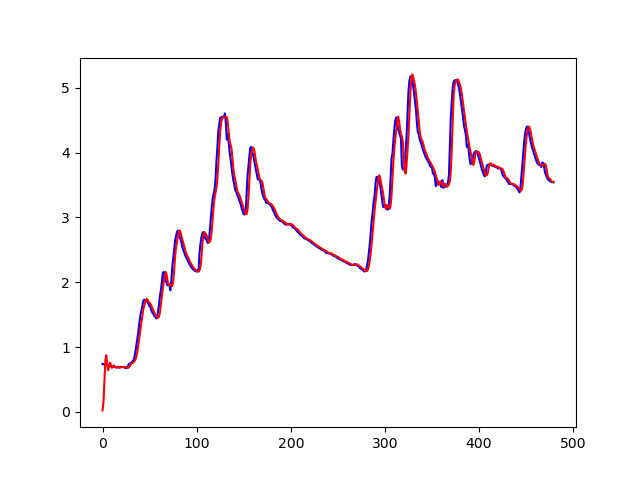

In [12]:
plt.figure()
plt.plot(current_row, color='blue')
plt.plot(filtered_EDA, color='red')
plt.show()

Next, the peaks are detected using the EDA Explorer.
Here, the parameters can be set in `extractGsrFeatures`, but their default values are also set.

The explanations and illustrations of these parameters can be found at the [EDA Explorer FAQ](https://eda-explorer.media.mit.edu/info/), but in brief, they are:
* threshold: the minimum amplitude a potential skin conductance response (SCR) must reach in order to be counted as an SCR (in µS); 
* offset: the number of seconds for which the *derivative must be positive before a peak* and the derivative must be negative after a peak; 
* max rise time: allowed time in seconds from the "start" of the peak to the apex of a peak;
* max decay time: allowed time in seconds after the apex of a peak to the 50 % of maximum amplitude of the peak.

Their default values are: `(threshold=.02, offset=1, riseTime=4, decayTime=4,)`

In [13]:
gsr_data = pd.DataFrame(current_row, columns=["EDA"])
startTime = pd.to_datetime(0, unit="s")
gsr_data.index = pd.date_range(start=startTime, periods=len(gsr_data), freq=str(1000/sampleRate_EDA) + 'L')
gsr_data['filtered_eda'] = filtered_EDA
peakData = calcPeakFeatures(gsr_data, offset=1, thresh=.02, start_WT=4, end_WT=4, sampleRate=int(sampleRate_EDA))

This function returns peaks (i.e., the time of the peaks) and their characteristics.
These include their start and end time (when the amplitude falls by 50 %), their amplitude, their duration (or width) and more.

Some peaks are visualized below, along with their start (>) and end (■) times.

In [14]:
peaks = np.where(peakData.peaks == 1.0)[0]
peak_starts = np.where(peakData.peak_start == 1.0)[0]
peak_ends = np.where(peakData.peak_end == 1.0)[0]
print(peaks)
print(peak_starts)
print(peak_ends)

[ 46  66  81 107 159 293 313 328 376 397 452]
[ 17  30  58  73 101 152 280 304 321 365 393 444]
[ 58  73  89 112 168 304 318 334 386 400 460]


<IPython.core.display.Javascript object>


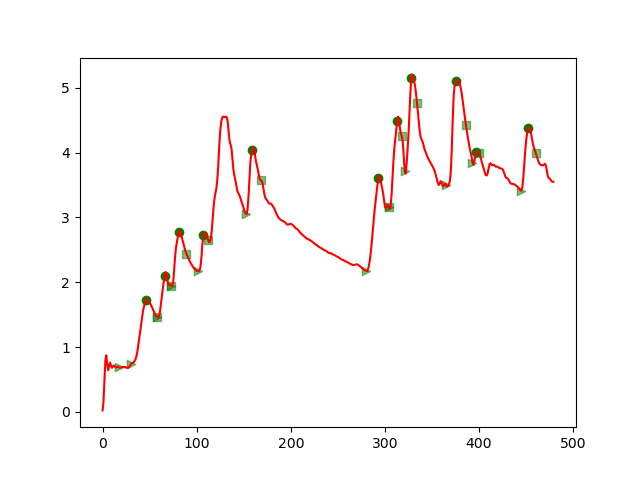

In [15]:
plt.figure()
plt.plot(filtered_EDA, color='red')
plt.scatter(peaks, filtered_EDA[peaks], color="green")
plt.scatter(peak_starts, filtered_EDA[peak_starts], color="green", marker=">", alpha=0.5)
plt.scatter(peak_ends, filtered_EDA[peak_ends], color="green", marker="s", alpha=0.5)
plt.show()

Features, related to the peaks, are then calculated.
These include the number and rate (peaks per second) of the peaks, as well as the average and maximum of their characteristics (duration, increase and decrease time etc.)

In [16]:
print(df_EDA.loc[no_interest, df_EDA.columns.str.contains('Peak')])

avgPeakAmplitudeChangeAfter      0.564829
avgPeakAmplitudeChangeBefore     0.000000
avgPeakChangeRatio               0.096774
avgPeakDecreaseTime              2.818182
avgPeakDuration                 49.454545
avgPeakIncreaseTime              0.272727
maxPeakAmplitudeChangeAfter      1.660329
maxPeakAmplitudeChangeBefore     1.400329
maxPeakChangeRatio               0.259259
maxPeakDecreaseTime              6.750000
maxPeakDuration                  8.500000
maxPeakIncreaseTime              1.750000
maxPeakResponseSlopeAfter       -0.065041
maxPeakResponseSlopeBefore       0.233815
numPeaks                        11.000000
powerPeaks                       3.643448
ratePeaks                        0.091667
Name: 131, dtype: float64


In [17]:
calculatedFeatures_EDA = calculateFeatures(eda_data_2D, fs=int(sampleRate_EDA), featureNames=gsrFeatureNames)

100%|██████████| 239/239 [01:04<00:00,  3.69it/s]
